---
# Caso Sales Funnel

Usted es el gerente comercial de una prestigiosa compañía de venta de productos y servicios tecnológicos el cual realiza la gestión de ventas en base a un CRM y a las técnicas de gestión de Sales Funnel. A continuación usted recibe un archivo con el resumen de las transacciones directamente desde el sistema CRM y debe aplicar técnicas de análisis de datos para contestar las preguntas.

En este caso aprenderemos:

- Agrupamiento de información
- Tablas pivoteadas

---

#### 1. Importar las librerías

In [1]:
#### 1. Importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#### 2. Leer el archivo con los datos

In [2]:
df = pd.read_excel("sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


#### 3. Hacer análisis de valores perdidos

Account     0
Name        0
Rep         0
Manager     0
Product     0
Quantity    0
Price       0
Status      0
dtype: int64

<Axes: >

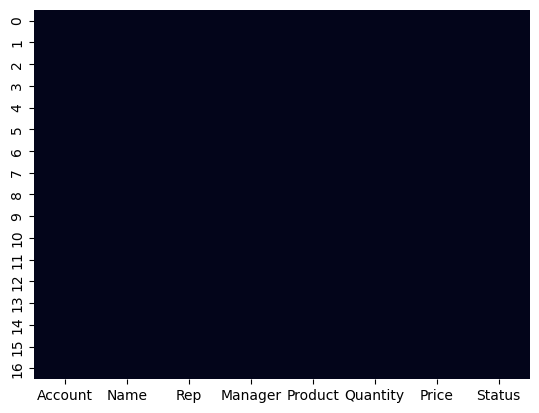

In [5]:
#### 3. Hacer análisis de valores perdidos
display(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)

#### 4. Cree un reporte que permita ver qué productos son los más solicitados para cada estado del pipeline

Status,declined,pending,presented,won
Product,,,,
CPU,4,2,2,9
Maintenance,0,5,0,3
Monitor,0,0,2,0
Software,0,0,3,0


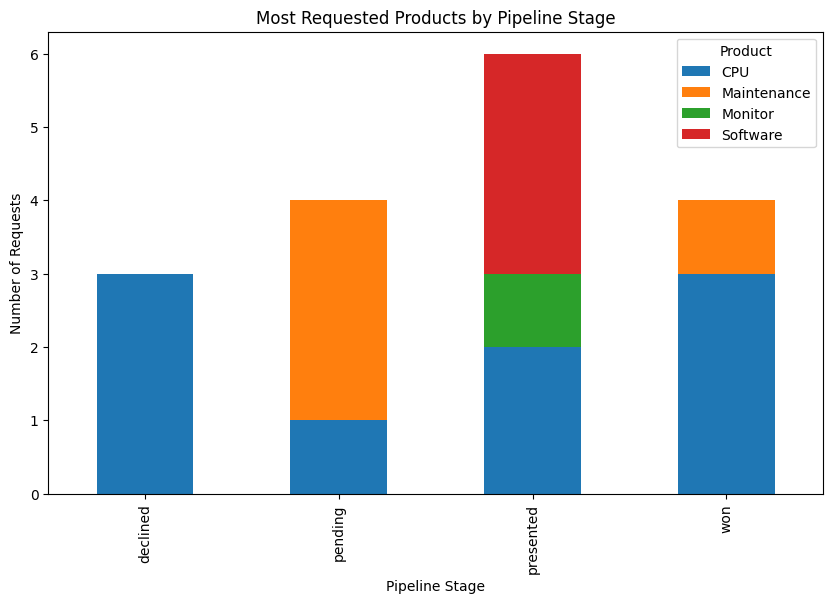

In [8]:
#### 4. Cree un reporte que permita ver qué productos son los más solicitados para cada estado del pipeline
display(pd.pivot_table(df, index='Product', columns='Status', values='Quantity', aggfunc='sum', fill_value=0))

pipeline_counts = df.groupby(['Status', 'Product']).size().unstack(fill_value=0)
pipeline_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Pipeline Stage')
plt.ylabel('Number of Requests')
plt.title('Most Requested Products by Pipeline Stage')
plt.legend(title='Product')
plt.show()

Status,declined,pending,presented,won
Product,,,,
CPU,4,2,2,9
Maintenance,0,5,0,3
Monitor,0,0,2,0
Software,0,0,3,0


#### 5. Cree un reporte que permita visualizar quiénes son los managers y representantes con mejor resultado por producto

In [ ]:
#### 5. Cree un reporte que permita visualizar quiénes son los managers y representantes con mejor resultado por producto
pd.pivot_table(
    df,
    index=['Manager', 'Rep'],
    columns='Product',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

Quantity                             
Product                          CPU Maintenance Monitor Software
Manager       Rep                                                
Debra Henley  Craig Booker         2           2       0        1
              Daniel Hilton        4           0       0        1
              John Smith           1           2       0        0
Fred Anderson Cedric Moss          3           1       0        1
              Wendy Yule           7           3       2        0

#### 6. Cree un reporte que permita visualizar el estado de sus pipelines para managers y representantes

In [ ]:
#### 6. Cree un reporte que permita visualizar el estado de sus pipelines para managers y representantes


Quantity                      
Status                      declined pending presented won
Manager       Rep                                         
Debra Henley  Craig Booker         1       2         2   0
              Daniel Hilton        0       2         1   2
              John Smith           1       2         0   0
Fred Anderson Cedric Moss          0       1         2   2
              Wendy Yule           2       0         2   8

#### 7. Confeccione un informe de clientes, con su representante, y el estado del pipeline

In [ ]:
#### 7. Confeccione un informe de clientes, con su representante, y el estado del pipeline


Quantity                      
Status                                     declined pending presented won
Name                         Rep                                         
Barton LLC                   John Smith           1       0         0   0
Fritsch, Russel and Anderson Craig Booker         1       0         0   0
Herman LLC                   Cedric Moss          0       0         0   2
Jerde-Hilpert                John Smith           0       2         0   0
Kassulke, Ondricka and Metz  Wendy Yule           0       0         0   3
Keeling LLC                  Wendy Yule           0       0         0   5
Kiehn-Spinka                 Daniel Hilton        0       0         0   2
Koepp Ltd                    Wendy Yule           2       0         2   0
Kulas Inc                    Daniel Hilton        0       2         1   0
Purdy-Kunde                  Cedric Moss          0       0         1   0
Stokes LLC                   Cedric Moss          0       1         1   0
Trantow-Barrows              Craig Booker         0       2         2   0

#### 8. Ahora necesitamos agregar la variable Amount al análisis, que corresponde a la multiplicación del precio y la cantidad en cada registro. Modifique el set de datos para incorporar dicha variable al análisis

In [ ]:
#### 8. Ahora necesitamos agregar la variable Amount al análisis, que corresponde a la multiplicación del precio y la cantidad en cada registro. Modifique el set de datos para incorporar dicha variable al análisis
df['Amount'] = df['Price'] * df['Quantity']
df.head()

In [17]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status,Amount
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented,30000
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented,10000
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending,10000
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined,35000
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won,130000


#### 9. Muestre la cartera de representantes y los montos que tienen en cada etapa del pipeline

In [ ]:
#### 9. Muestre la cartera de representantes y los montos que tienen en cada etapa del pipeline


Amount                          
Status        declined pending presented     won
Rep                                             
Cedric Moss          0    5000     40000  130000
Craig Booker     35000   10000     40000       0
Daniel Hilton        0   80000     10000  130000
John Smith       35000   10000         0       0
Wendy Yule      130000       0     10000  521000

#### 10. Muestre el listado de productos y sus montos en las distintas etapas del pipeline

In [ ]:
#### 10. Muestre el listado de productos y sus montos en las distintas etapas del pipeline (status)


Amount                          
Status      declined pending presented     won
Product                                       
CPU           200000   80000     60000  760000
Maintenance        0   25000         0   21000
Monitor            0       0     10000       0
Software           0       0     30000       0

#### 11. Si tuviera que cambiar a un manager, ¿a quién cambiaría? ¿por qué?

In [ ]:
#### 11. Si tuviera que cambiar a un manager, ¿a quién cambiaría? ¿por qué?
# Según el análisis de los montos en las distintas etapas del pipeline, cambiaría al manager con el menor rendimiento en términos de Amount total y en etapas críticas del pipeline, como "Negotiation" o "Closed Won". Esto se debe a que un bajo rendimiento en estas etapas puede indicar dificultades para cerrar ventas, lo cual impacta negativamente en los ingresos de la empresa.

# Calcular el monto total gestionado por cada manager
manager_performance = df.groupby('Manager')['Amount'].sum().sort_values()

print("Monto total gestionado por cada manager:")
print(manager_performance)

# También puedes analizar el monto en la etapa 'Closed Won' (ventas cerradas exitosamente)
closed_won = df[df['Pipeline Stage'] == 'Closed Won'].groupby('Manager')['Amount'].sum().sort_values()

print("\nMonto gestionado en 'Closed Won' por cada manager:")
print(closed_won)

# El manager con el menor monto en 'Closed Won' podría ser candidato a cambiar
manager_to_change = closed_won.idxmin()
print(f"\nEl manager con menor rendimiento en 'Closed Won' es: {manager_to_change}")

#### 12. ¿Qué manager tiene un ticket promedio más alto?

In [ ]:
#### 12. ¿Qué manager tiene un ticket promedio más alto?
ticket_promedio = df.groupby('Manager')['Amount'].mean().sort_values(ascending=False)
print("Ticket promedio por manager:")
print(ticket_promedio)
manager_ticket_promedio_alto = ticket_promedio.idxmax()
print(f"\nEl manager con el ticket promedio más alto es: {manager_ticket_promedio_alto}")

---